In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [58]:
path_tr = r'M:\mechine_learning_lab6a\mechine_learning_lab6a\University Lab Exam\Data Set\Rice_Image_Dataset - Copy\Rice_Image_Dataset - Copy\train'
path_te = r'M:\mechine_learning_lab6a\mechine_learning_lab6a\University Lab Exam\Data Set\Rice_Image_Dataset - Copy\Rice_Image_Dataset - Copy\test'

image_size = (64,64)
b_size = 32

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)

validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255,
    validation_split=0.2
)

tr_ds = train_generator.flow_from_directory(
    path_tr,
    target_size = image_size,
    batch_size = b_size,
    class_mode = 'categorical',
    subset='training',
    shuffle=True
)

te_ds = validation_generator.flow_from_directory(
    path_te,
    target_size = image_size,
    batch_size = b_size,
    class_mode = 'categorical',
    subset='validation',
    shuffle=True
)

print("\nDataset information:")
print(f"Number of classes: {len(tr_ds.class_indices)}")
print(f"Class names: {list(tr_ds.class_indices.keys())}")
print(f"Training samples: {tr_ds.samples}")
print(f"Validation samples: {te_ds.samples}")


Found 44 images belonging to 5 classes.
Found 11 images belonging to 5 classes.

Dataset information:
Number of classes: 5
Class names: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
Training samples: 44
Validation samples: 11


In [46]:
# Get number of classes
num_classes = len(tr_ds.class_indices)

model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(image_size[0], image_size[1], 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(num_classes,activation='relu')
])
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
model.summary()

# Train model
history = model.fit(
    tr_ds,
    steps_per_epoch=train_steps,
    epochs=10,
    validation_data=te_ds,
    validation_steps=val_steps)


# Evaluate model
loss, accuracy = model.evaluate(te_ds)
print(f"\nFinal Validation Accuracy: {accuracy*100:.2f}%")
print(f"Final Validation Loss: {loss:.4f}")


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │           5,765 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,157 (98.27 KB)

 Trainable params: 25,157 (98.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1667 - loss: 4.9421 - val_accuracy: 0.1818 - val_loss: 6.5485
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.1875 - loss: 5.6590
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2727 - val_loss: 4.2715
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.3438 - loss: 3.8472
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5833 - loss: 2.5588 - val_accuracy: 0.3636 - val_loss: 4.0564
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.3438 - loss: 2.3939 - val_accuracy: 0.2727 - val_loss: 2.9114
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 2.5030
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2727 - val_loss: 2.8630
Epoch 10/10
1/1 ━━

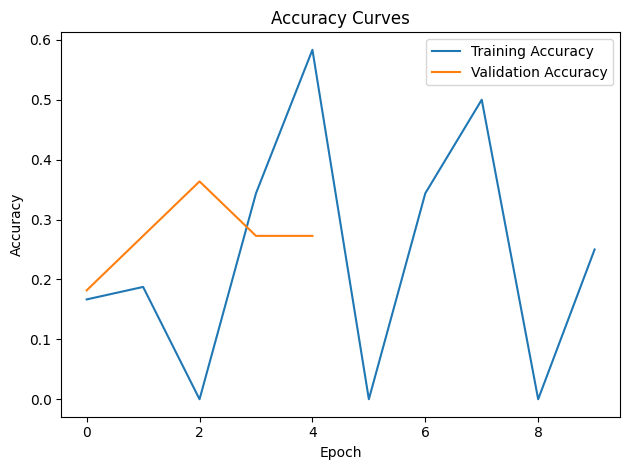

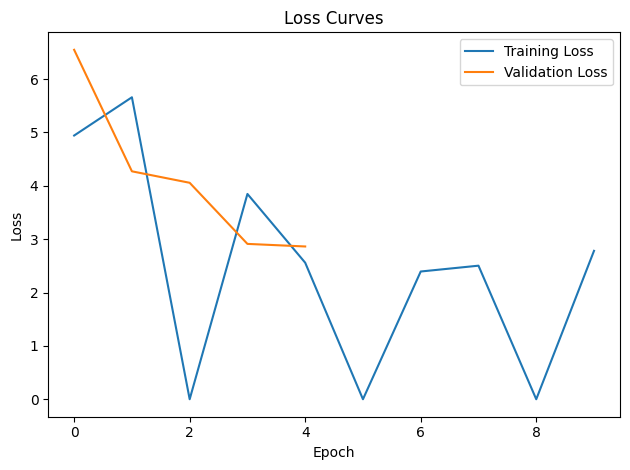

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()